In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from xml.etree import ElementTree
from matplotlib import  pyplot as plt

In [2]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras import datasets, layers, models


In [3]:
class_names = ['person','person-like']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

n_classes = 2
size = (200,200)

In [4]:
def load_data():
    datasets = ['Train/Train', 'Test/Test', 'Val/Val']
    output = []

    for dataset in datasets:
        imags = []
        labels = []
        directoryA = "./" + dataset +"/Annotations"
        directoryIMG = "./" + dataset +"/JPEGImages/"
        file = os.listdir(directoryA)
        img = os.listdir(directoryIMG)
        file.sort()
        img.sort()

        i = 0
        for xml in file:

            xmlf = os.path.join(directoryA,xml)
            dom = ElementTree.parse(xmlf)
            vb = dom.findall('object')
            label = vb[0].find('name').text
            labels.append(class_names_label[label])

            img_path = directoryIMG + img[i]
            curr_img = cv2.imread(img_path)
            curr_img = cv2.resize(curr_img, size)
            imags.append(curr_img)
            i +=1
        
        imags = np.array(imags, dtype='float32')
        imags = imags / 255
        
      #  labels = pd.DataFrame(labels)
        labels = np.array(labels, dtype='int32')

        output.append((imags, labels))
    return output


In [5]:
(train_images, train_labels),(test_images, test_labels),(val_images, val_labels) = load_data()

In [6]:
values, counts=np.unique(train_labels,return_counts=True)
print(counts)

[533 411]


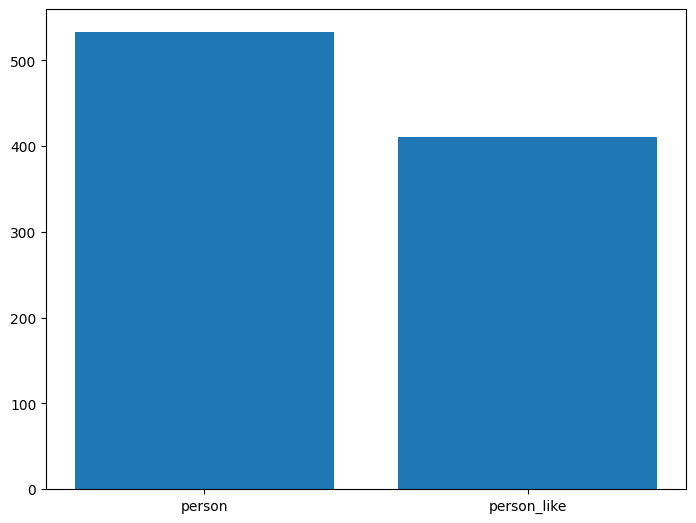

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lab = ['person','person_like']
values = [533,411]
ax.bar(lab,values)
plt.show()

In [8]:
train_images.shape

(944, 200, 200, 3)

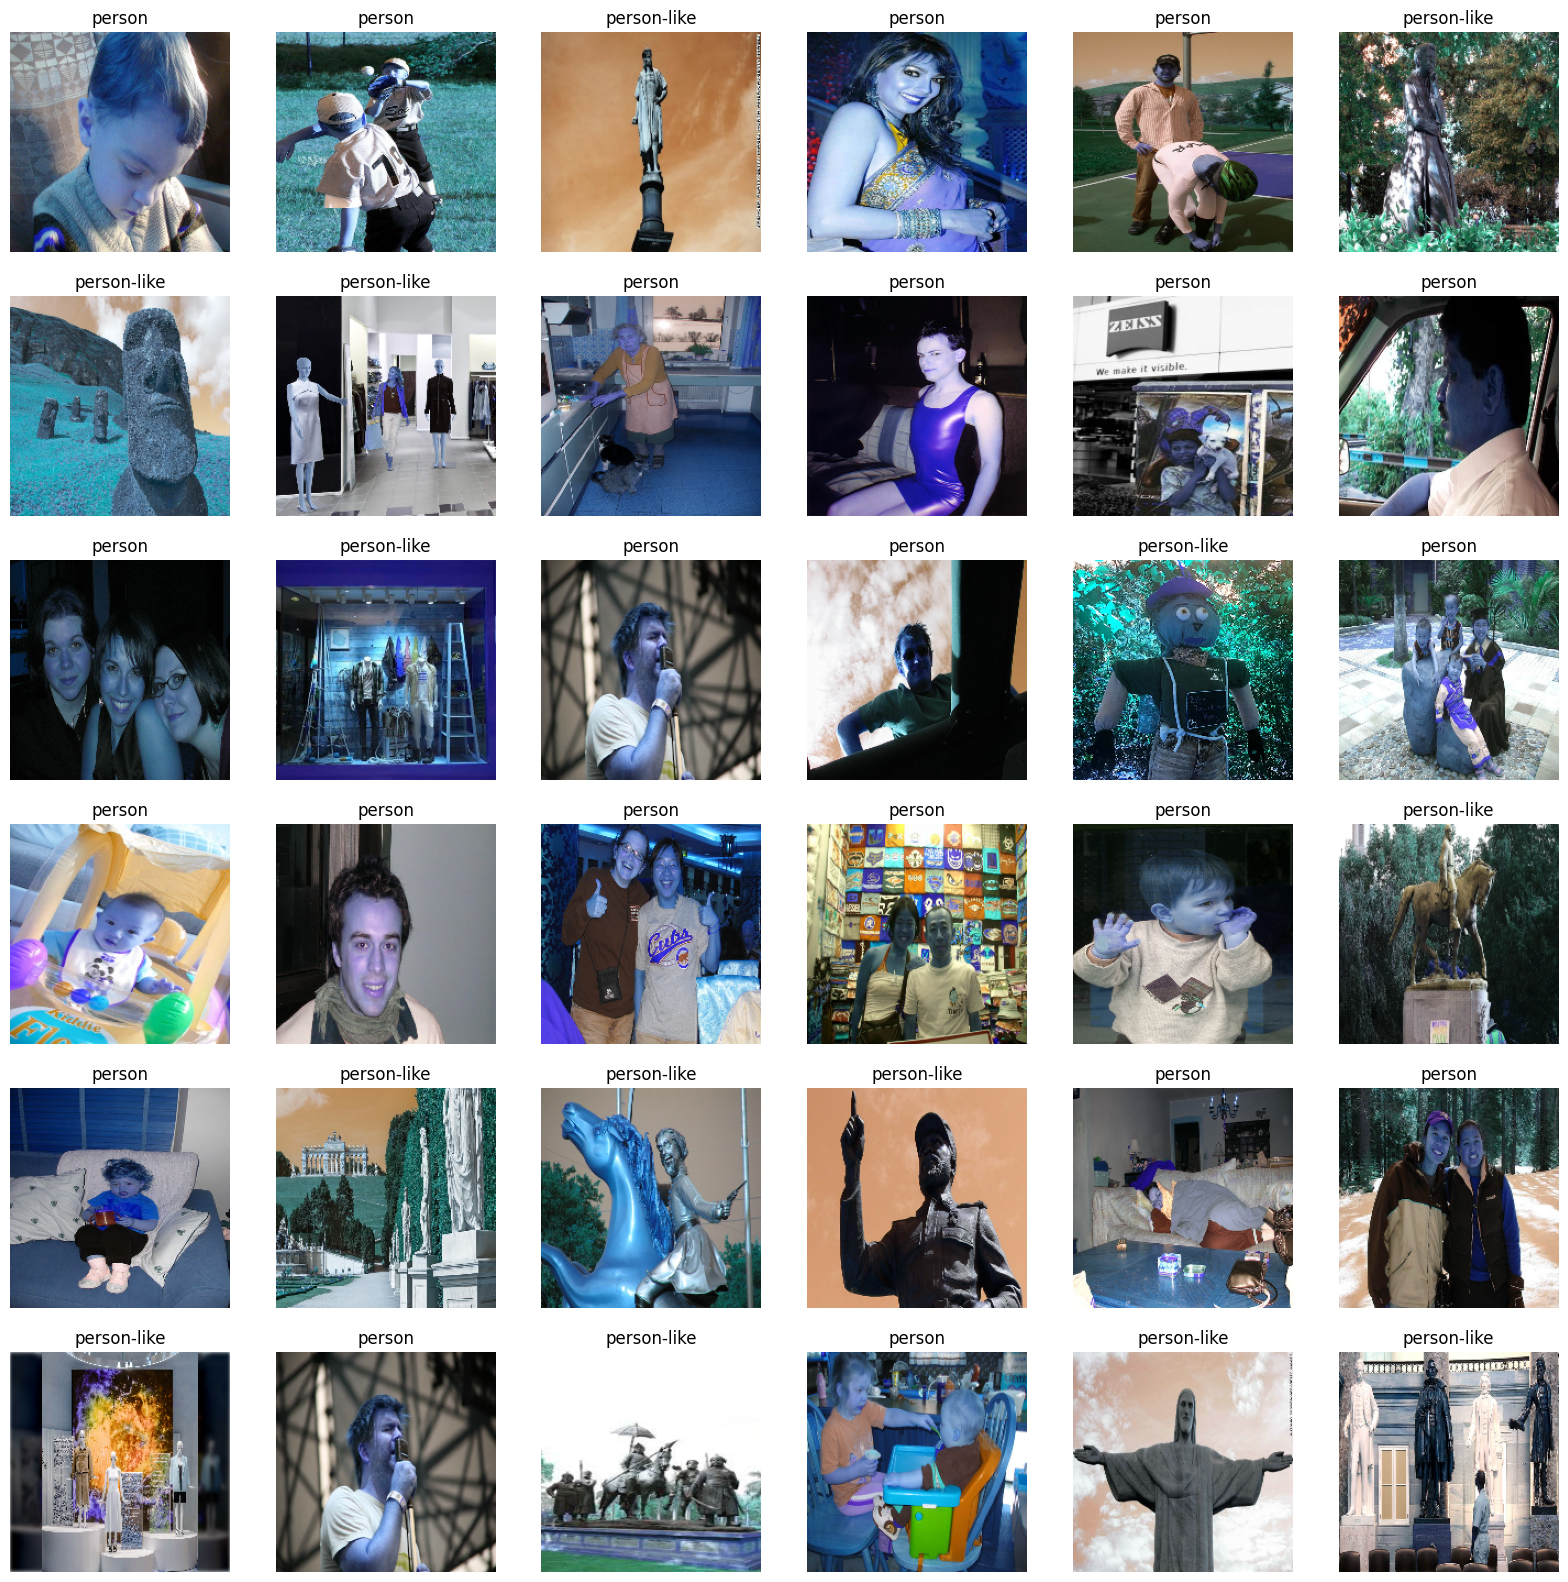

In [9]:
plt.figure(figsize=(20,20))

for n,i in enumerate(list(np.random.randint(0,len(train_images),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(train_images[i])  
    plt.title(class_names[train_labels[i]])
    plt.axis('off')

In [10]:
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2))

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 135424)            0

In [14]:
train_images.shape


(944, 200, 200, 3)

In [13]:
'''
from tensorflow.keras.callbacks import ModelCheckpoint
fle_s='Pedestrian_Detection.h5'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]
'''

"\nfrom tensorflow.keras.callbacks import ModelCheckpoint\nfle_s='Pedestrian_Detection.h5'\ncheckpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')\nEarly_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')\ncallback_list=[checkpoint,Early_stop]\n"

In [27]:
history = model.fit(train_images, train_labels, epochs=15, 
                    validation_data=(test_images, test_labels),batch_size=1)

Epoch 1/15
944/944 [==============================] - 220s 233ms/step - loss: 0.1226 - accuracy: 0.9629 - val_loss: 2.4703 - val_accuracy: 0.5574
Epoch 2/15
944/944 [==============================] - 223s 237ms/step - loss: 0.0505 - accuracy: 0.9841 - val_loss: 3.4835 - val_accuracy: 0.5872
Epoch 3/15
944/944 [==============================] - 228s 241ms/step - loss: 0.0325 - accuracy: 0.9862 - val_loss: 2.3222 - val_accuracy: 0.5915
Epoch 4/15
944/944 [==============================] - 231s 245ms/step - loss: 0.0368 - accuracy: 0.9883 - val_loss: 5.3959 - val_accuracy: 0.6085
Epoch 5/15
944/944 [==============================] - 219s 232ms/step - loss: 0.0755 - accuracy: 0.9799 - val_loss: 5.2200 - val_accuracy: 0.5787
Epoch 6/15
944/944 [==============================] - 216s 229ms/step - loss: 0.0564 - accuracy: 0.9873 - val_loss: 3.7615 - val_accuracy: 0.5617
Epoch 7/15
944/944 [==============================] - 212s 225ms/step - loss: 0.0536 - accuracy: 0.9873 - val_loss: 3.6796 -

In [28]:
fle_s='Pedestrian_Detection2.h5'
model.save(fle_s)

C:\Users\Maitri Savla\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
test_images.shape

(235, 200, 200, 3)

In [30]:
model.evaluate(test_images, test_labels,batch_size=1)

235/235 [==============================] - 4s 19ms/step - loss: 8.5819 - accuracy: 0.5617


[8.58193302154541, 0.5617021322250366]

In [31]:
pred = model.predict(test_images,batch_size=1)

235/235 [==============================] - 4s 19ms/step


In [32]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

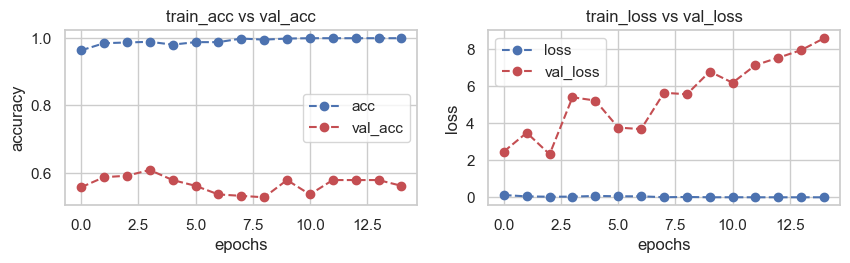

In [33]:
plot_accuracy_loss(history)

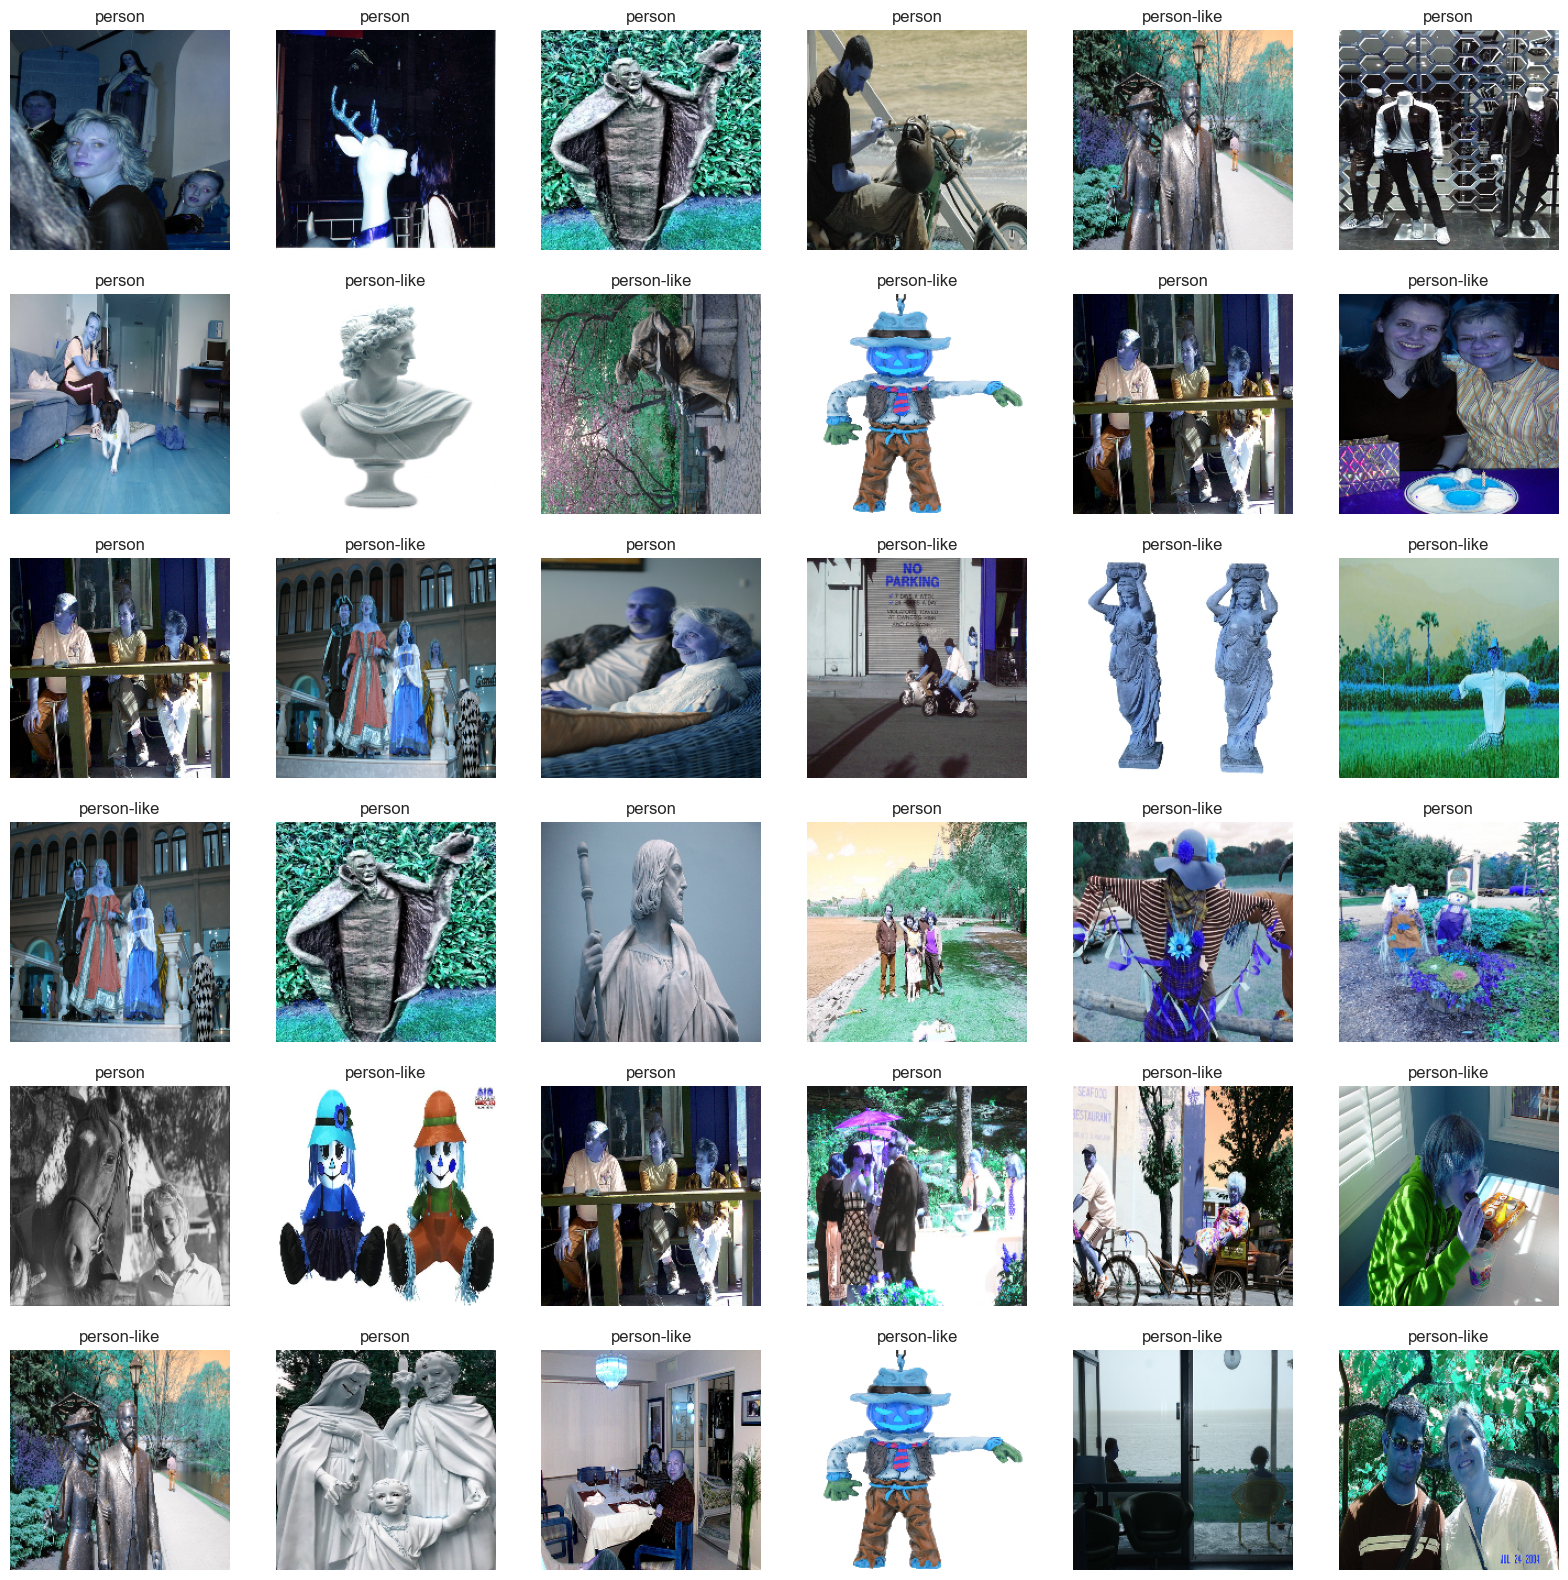

In [34]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(val_images),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(val_images[i])    
    plt.axis('off')
    x =np.argmax(pred[i]) # takes the maximum of of the 6 probabilites. 
    plt.title((class_names[x]))

In [37]:
result = []
for i in range(len(pred)):
    result.append(np.argmax(pred[i]))

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [39]:
report=classification_report(test_labels,result)

In [40]:
print(report)

              precision    recall  f1-score   support

           0       0.62      0.63      0.63       136
           1       0.48      0.46      0.47        99

    accuracy                           0.56       235
   macro avg       0.55      0.55      0.55       235
weighted avg       0.56      0.56      0.56       235



In [42]:
results = confusion_matrix(test_labels, result)

<Axes: >

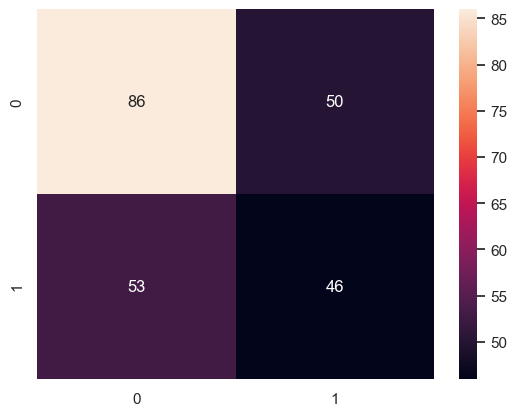

In [43]:
import seaborn as sns
sns.heatmap(results,annot=True)